* Modelo predictivo de redes neuronales para el **reconocimiento de imágenes de texto escrito a mano**.

* Implementado mediante Keras.

* El script tiene objetivos pedagógicos.

* Se obtiene un modelo con un accuracy (out-sample) del 94.5% al reconocer los dígitos.

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from sklearn.metrics import classification_report

###################################################
# Config
###################################################
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

2023-02-04 18:36:27.679906: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-02-04 18:36:27.683157: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-02-04 18:36:27.683168: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
###################################################
# 1. Load dataset
###################################################

# Carga de datos
# mnist es una base de datos de dígitos escritos a mano
mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()

# El dataset de entrenamiento corresponde a 60000 imágenes de dígitos a mano 
# (con sus respectivas labels)
# Por otro lado, está el dataset de 10000 imágenes para testing
[x_train.shape, y_train.shape, x_test.shape, y_test.shape]

[(60000, 28, 28), (60000,), (10000, 28, 28), (10000,)]

In [3]:
#Estos van del 0 al 9.
y_train[:20]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5, 3, 6, 1, 7, 2, 8, 6, 9],
      dtype=uint8)

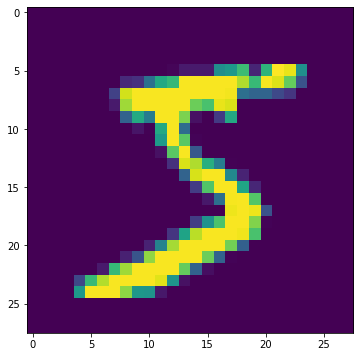

In [4]:
# la primera imagen 
fig, ax = plt.subplots(figsize = (10,6))
ax.imshow(x_train[0]);

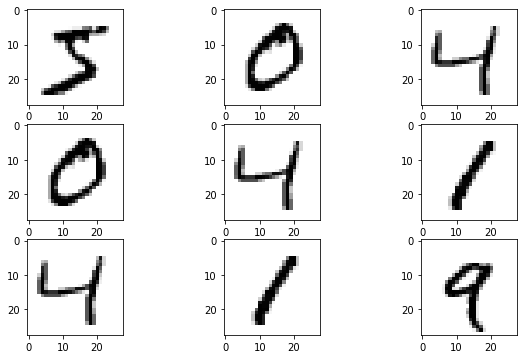

In [10]:
fig, ax = plt.subplots(3,3,figsize = (10,6))
for i in range(3):
    for j in range(3):
        ax[i,j].imshow(x_train[i+j], cmap=plt.cm.binary)

In [12]:
###################################################
# 3. Design NN
###################################################

neuronas_capa_a = 128
activation_capa_a = 'relu'
neuronas_capa_salida = '10'
activation_capa_salida = 'softmax'
optimizer = 'adam'
loss = 'sparse_categorical_crossentropy'
metrics = ['accuracy']
epochs = 5

# arquitectura
modelo = Sequential()
modelo.add(Flatten(input_shape = (28,28))) # capa 1: reformateo del set de datos, donde cada matriz de 28x28 lo transforma en una fila. Sólo preprocesamiento.
modelo.add(Dense(units = neuronas_capa_a, activation = activation_capa_a)) # capa 2: capa de 128 neuronas, tipo Dense
modelo.add(Dense(units = neuronas_capa_salida, activation = activation_capa_salida)) # capa 3: 10 neuronas de capa de salida, una por dígito, para devolver probabilidades por clase posible.  
modelo.compile(optimizer = optimizer, loss = loss, metrics = metrics) # compilacion: 1. determina cómo se actualiza el modelo, 2.determina la función de pérdida 3.determina la métrica de monitoreo del proceso

modelo.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               100480    
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [13]:
###################################################
# 4. Train
###################################################
hist = modelo.fit(x_train, y_train, 
                  epochs = epochs,
                  validation_split = 0.2)

Epoch 1/5
1500/1500 [==============================] - 2s 1ms/step - loss: 2.9982 - accuracy: 0.8546 - val_loss: 0.5220 - val_accuracy: 0.8913
Epoch 2/5
1500/1500 [==============================] - 2s 1ms/step - loss: 0.4212 - accuracy: 0.9078 - val_loss: 0.4511 - val_accuracy: 0.9025
Epoch 3/5
1500/1500 [==============================] - 2s 1ms/step - loss: 0.2984 - accuracy: 0.9243 - val_loss: 0.3470 - val_accuracy: 0.9206
Epoch 4/5
1500/1500 [==============================] - 2s 1ms/step - loss: 0.2734 - accuracy: 0.9318 - val_loss: 0.2961 - val_accuracy: 0.9283
Epoch 5/5
1500/1500 [==============================] - 2s 1ms/step - loss: 0.2472 - accuracy: 0.9368 - val_loss: 0.2562 - val_accuracy: 0.9336


In [16]:
###################################################
# 5. Evaluate (in sample)
###################################################
y_pred = modelo.predict(x_train)
modelo.evaluate(x_train, y_train)

1875/1875 [==============================] - 1s 586us/step - loss: 0.2178 - accuracy: 0.9387


[0.21784445643424988, 0.9387166500091553]

In [17]:
# evaluación (out-sample)
modelo.evaluate(x_test, y_test)

313/313 [==============================] - 0s 634us/step - loss: 0.2735 - accuracy: 0.9315


[0.27346986532211304, 0.9315000176429749]

In [18]:
# evaluación (out-sample)
#pd.set_option('precision', 5)
y_predict = modelo.predict(x_test)
y_predict.shape
pd.DataFrame(y_predict.round(3)).head(20)

313/313 [==============================] - 0s 508us/step


(10000, 10)

,0,1,2,3,4,5,6,7,8,9
0,0.000,0.003,0.000,0.091,0.000,0.000,0.000,0.905,0.000,0.000
1,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
2,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
3,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
4,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000
5,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
6,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000
7,0.000,0.000,0.000,0.000,0.054,0.000,0.000,0.017,0.000,0.928
8,0.000,0.000,0.000,0.000,0.000,0.966,0.032,0.000,0.001,0.000
9,0.001,0.000,0.000,0.000,0.006,0.000,0.000,0.004,0.000,0.988


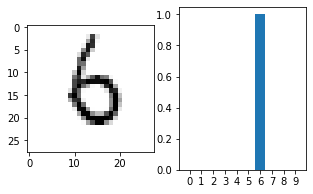

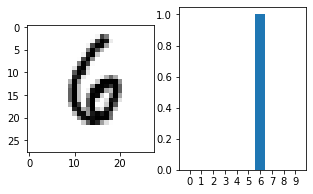

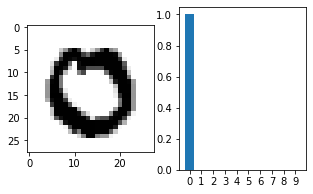

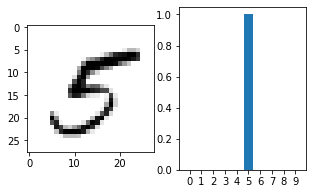

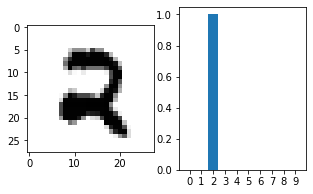

In [19]:
# gráfica resultados
def imprimir_resultados(ejemplos):
    for ejemplo in ejemplos:
        fig, ax = plt.subplots(1,2,figsize = (5,3))
        ax[0].imshow(x_test[ejemplo], cmap=plt.cm.binary)
        ax[1].bar(np.linspace(0,9,10),y_predict[ejemplo])
        ax[1].set_xticks(np.linspace(0,9,10))


ejemplos =[]
for _ in range(5): ejemplos.append(random.randint(0,10000))

imprimir_resultados(ejemplos)

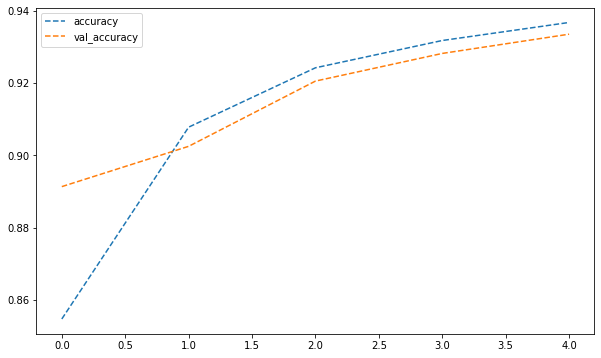

In [20]:
# visión del overfitting
res = pd.DataFrame(hist.history)
res[['accuracy', 'val_accuracy']].plot(figsize=(10, 6), style='--');